IMPORTING PANDAS AND NUMPY

In [10]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re

IMPORTING DATASET

In [11]:
df = pd.read_csv('Unclean-amazon Dataset.csv')

VIEWING THE DATA

In [ ]:
df.head()

DROPPING THE IMG_LINK AND PRODUCT LINK COLUMNS

In [ ]:
df.drop(columns = "img_link")
df.drop(columns = "product_link")

CONVERTING DATATYPE TO FLOAT FOR THE PRICE COLUMN

In [4]:
def clean_numeric(value):
    if pd.isna(value):
        return None
    value = str(value)
    value = re.sub(r'[^\d.-]', '', value)  # Keep digits, dots, and minus signs
    return float(value) if value else None


In [5]:
columns_to_fix = ["discounted_price","actual_price","discount_percentage"
]

for col in columns_to_fix:
    df[col] = df[col].apply(clean_numeric)


In [ ]:
print(df.dtypes)

CORRELATION ANALYSIS BETWEEN DISCOUNTED PRICE,ACTUAL PRICE AND DISCOUNT PERCENTAGE

In [6]:
correlation_matrix = df[["discounted_price","actual_price","discount_percentage"]].corr()

print(correlation_matrix)





                     discounted_price  actual_price  discount_percentage
discounted_price             1.000000      0.961915            -0.242412
actual_price                 0.961915      1.000000            -0.118098
discount_percentage         -0.242412     -0.118098             1.000000


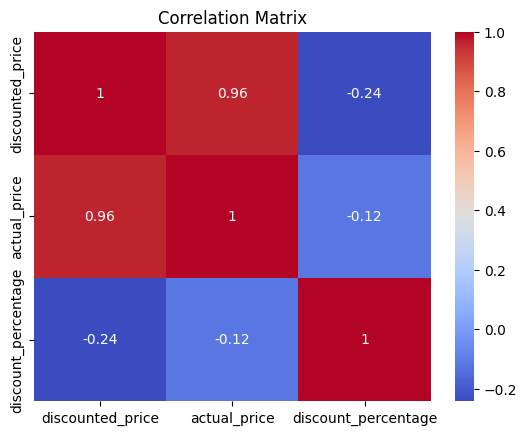

In [7]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

FINDING THE TOP RATED PRODUCTS

In [ ]:
# Convert to numeric types
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

# Extract top-level category
df['main_category'] = df['category'].str.split('|').str[0]

# Drop rows with missing values and make a copy
df_clean = df.dropna(subset=['rating', 'rating_count']).copy()

# Create a custom score
df_clean['score'] = df_clean['rating'] * np.log1p(df_clean['rating_count'])

# Sort and group to get top 3 products per main category
top_products = df_clean.sort_values(['main_category', 'score'], ascending=[True, False])\
                       .groupby('main_category').head(3)

# Show key columns
top_products[['main_category', 'product_name', 'rating', 'rating_count', 'score']]


DATA VISUALIZATION

BAR PLOT

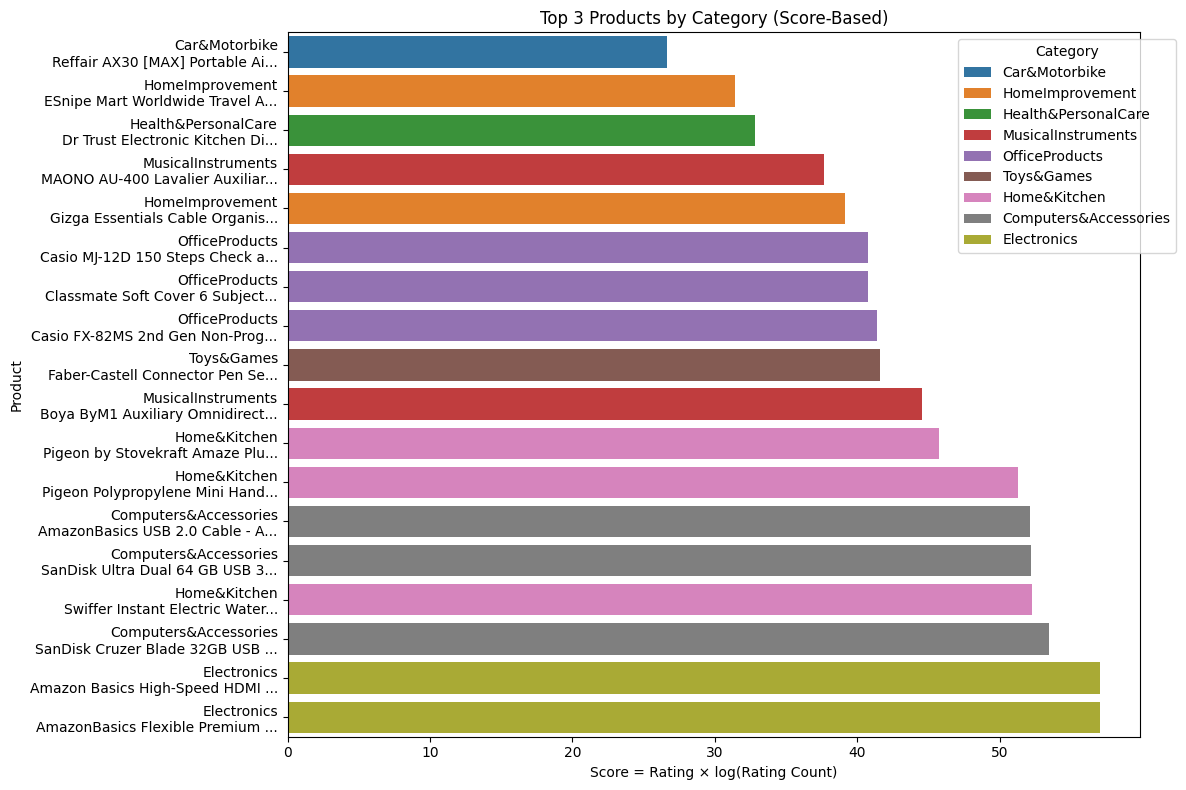

In [13]:
# Create a label combining category and product name
top_products['label'] = top_products['main_category'] + "\n" + top_products['product_name'].str[:30] + "..."

plt.figure(figsize=(12, 8))
sns.barplot(data=top_products.sort_values('score'), y='label', x='score', hue='main_category', dodge=False)
plt.title('Top 3 Products by Category (Score-Based)')
plt.xlabel('Score = Rating × log(Rating Count)')
plt.ylabel('Product')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()



BOX PLOT

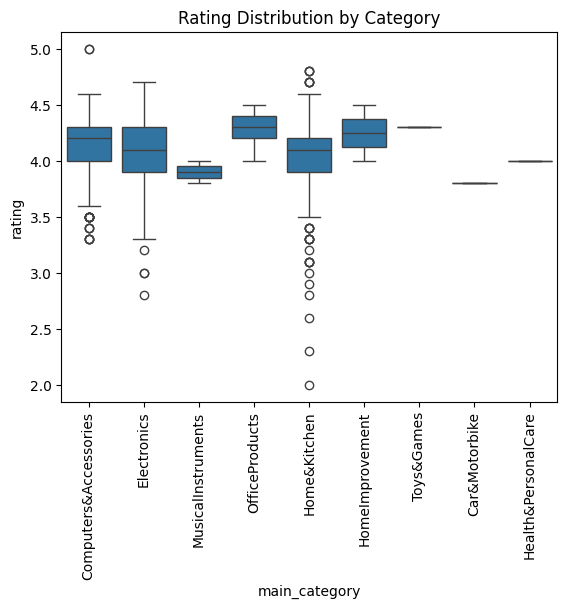

In [15]:
sns.boxplot(data=df_clean, x='main_category', y='rating')
plt.xticks(rotation=90)
plt.title('Rating Distribution by Category')
plt.show()


SCATTER PLOT

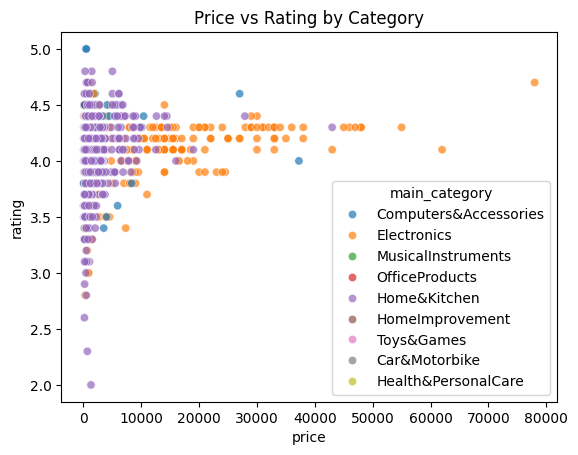

In [16]:
df_clean['price'] = pd.to_numeric(df_clean['discounted_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

sns.scatterplot(data=df_clean, x='price', y='rating', hue='main_category', alpha=0.7)
plt.title('Price vs Rating by Category')
plt.show()
